# import packages

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
!pip3 install numpy
!pip3 install pandas
!pip3 install torch
!pip3 install -Uqq fastbook
!pip3 install --user graphviz
print("Done")

In [6]:
import numpy as np
import pandas as pd
import torch
from fastai.tabular.all import *

# data preparation

In [7]:
raw_data = pd.read_csv(r'C:\Users\nielit\Downloads\data.csv')

In [8]:
raw_data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


# Split the Dataset into Training Set & Test Set

In [9]:
# Percentage to split by for training
perc = 90

# Set for training the model
data = raw_data.head(int(len(raw_data)*(perc/100))).copy()

# Set for testing the model later to get the real accuracy
test_set = raw_data.tail(int(len(raw_data)*((100-perc)/100))).copy()

In [10]:
data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10345,X20.V1.910,82,140,179,190,182,141,69,-26,-101,...,-107,-64,-17,8,26,37,47,71,107,4
10346,X19.V1.80,-34,-1,16,7,-11,-17,-18,-17,-15,...,24,32,54,72,77,78,76,57,43,5
10347,X19.V1.514,-43,-51,-55,-54,-50,-41,-32,-30,-27,...,-44,-36,-21,-13,0,10,14,13,7,2
10348,X9.V1.114,13,7,5,5,9,18,31,43,54,...,-16,-36,-57,-75,-94,-105,-110,-111,-110,2


# Format Data for Training

In [11]:
cont_names_data = list(data.columns.values)
cont_names_data.remove("Unnamed: 0")
cont_names_data.remove('y')

In [12]:
cat_names_data = []
for i in data["Unnamed: 0"]:
    cat_names_data.append(i)

In [13]:
data['y'].replace(2, 0, inplace=True)
data['y'].replace(3, 0, inplace=True)
data['y'].replace(4, 0, inplace=True)
data['y'].replace(5, 0, inplace=True)

In [14]:
data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10345,X20.V1.910,82,140,179,190,182,141,69,-26,-101,...,-107,-64,-17,8,26,37,47,71,107,0
10346,X19.V1.80,-34,-1,16,7,-11,-17,-18,-17,-15,...,24,32,54,72,77,78,76,57,43,0
10347,X19.V1.514,-43,-51,-55,-54,-50,-41,-32,-30,-27,...,-44,-36,-21,-13,0,10,14,13,7,0
10348,X9.V1.114,13,7,5,5,9,18,31,43,54,...,-16,-36,-57,-75,-94,-105,-110,-111,-110,0


# Making and Training the Tabular Model

In [15]:
splits = RandomSplitter(valid_pct=0.3, seed=None)(range_of(data))

to = TabularPandas(
    data,
    cont_names = cont_names_data,
    procs = [Normalize, FillMissing, Categorify],
    splits = splits,
    y_block = CategoryBlock,
    y_names= "y"
)

dls = to.dataloaders(bs=256)
dls.show_batch()

C:\Users\nielit\anaconda3\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,-55.000000,-55.999998,-58.000001,-52.000000,-41.000001,-32.000001,-11.000000,-2.000000,-3.000000,-4.000000,-8.000000,-14.000000,-34.000000,-42.999999,-52.999998,-62.000002,-66.000001,-60.000000,-43.000000,-1.900000e+01,1.200000e+01,19.999999,14.000001,1.000000,-5.000000,-13.000000,-16.000000,-15.000000,-16.000000,-23.000000,-30.000000,-23.000001,-23.000000,-13.000000,-3.000000,2.159215e-07,-1.000000,3.000000,11.000000,7.000000,5.000000,3.000000,-1.000000,3.000000,5.000000,16.000001,4.999999,-3.000000,-23.000000,-36.000000,-44.000001,-37.000001,-21.000000,-7.000000,11.000001,29.000000,44.000001,50.999998,61.000001,61.999998,48.999998,27.000000,-1.000000,-21.000000,-36.000001,-28.000001,-1.900000e+01,-6.000000,7.000001,23.999999,32.000001,29.000000,38.999998,51.999998,56.999999,47.999998,27.000001,7.000000,-17.000000,-21.000000,-32.000000,-37.999999,-33.000000,-16.000000,8.999999,28.000001,4.000000e+01,23.000000,-1.000000,-21.000000,-25.000000,-2.800000e+01,-27.999999,-32.000000,-45.000001,-66.000000,-82.000002,-69.000001,-45.000000,-12.000000,12.000000,12.999999,2.210485e-07,-13.000000,-12.000000,-20.000000,-26.000001,-31.000000,-36.000000,-40.000001,-36.999999,-17.000000,-7.000000,-9.999997e-01,-15.000000,-32.000001,-40.000001,-28.000000,-8.000000,2.000000,19.000000,28.000000,36.000002,33.999999,37.000001,39.999998,31.999999,14.000000,-8.000000,-26.000000,-33.999999,-1.400000e+01,4.000001,19.000001,20.000000,18.000000,11.000000,5.000000,16.000001,20.000001,19.000001,1.200000e+01,-2.000000,-18.000000,-34.000001,-29.000001,-24.000000,-14.000000,-4.000000,8.999999,10.000000,11.000000,27.999999,42.999998,48.000000,37.000000,22.999999,-2.000000,-9.000000,-11.000000,-8.000000,-7.000000,-3.000000,4.079594e-09,-4.000000,-2.000000,12.000000,33.000002,45.999999,57.000001,68.999998,60.000002,50.000000,3.000000e+01,1.100000e+01,1.313893e-07,1.000000,19.999999,0
1,102.999997,59.999999,46.000002,53.000002,68.999998,83.000003,99.000004,110.000001,105.000000,91.000003,74.999998,67.000002,62.000002,42.000001,48.000002,34.999999,33.000001,15.000001,-4.000000,-5.000000e+00,7.000000e+00,31.000001,38.000002,15.999999,18.000001,16.000000,10.000000,7.000000,5.000001,-11.000000,-30.999999,-31.999999,-26.000000,-12.000000,-12.000000,9.000001e+00,2.000000,-7.000000,-5.000000,-36.999999,-60.999999,-72.000000,-79.999998,-55.999998,-50.000002,-55.999999,-45.999999,-75.999998,-68.000000,-74.000000,-80.000002,-71.999999,-57.000000,-55.000000,-52.000000,-50.000002,-33.000001,-19.000000,-21.000000,-27.000000,-29.000000,-60.000001,-48.999999,-43.000001,-24.000000,-29.999999,-3.500000e+01,-33.000001,-46.000000,-42.000001,-39.000001,1.000000,9.000000,39.000002,12.000000,19.000000,4.000000,1.000000,-9.000000,-23.000000,-12.000000,-11.000000,-16.000000,-4.000000,-36.000000,-36.000000,-3.800000e+01,-33.999999,-50.999999,-63.999999,-70.000000,-8.000000e+01,-73.999998,-67.000001,-47.000001,-24.000000,-26.000000,-20.999999,-34.999999,-19.000000,-29.000000,-5.000000,-3.000000e+00,-23.000000,-20.000000,-14.000000,6.000001,38.000001,64.999999,96.000001,83.999999,86.000000,79.999997,6.600000e+01,71.999999,63.000002,70.999998,63.000001,54.999999,20.999999,10.000000,-1.000000,16.000000,41.999998,48.999

In [20]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="fastai.torch_core")

# Training

## Find the best learning rate

SuggestedLRs(valley=0.002511886414140463)


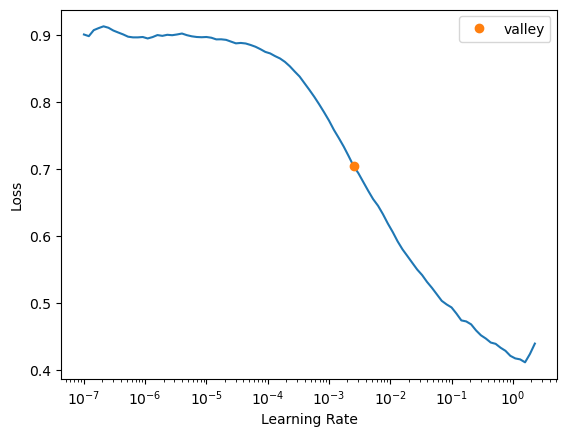

In [21]:
f1score = F1Score()

# Assuming you have already defined dls and cont_names_data
learn = tabular_learner(dls, metrics=[f1score, accuracy, error_rate])
lr_min = learn.lr_find()
print(lr_min)

ValueError: not enough values to unpack (expected 2, got 1)

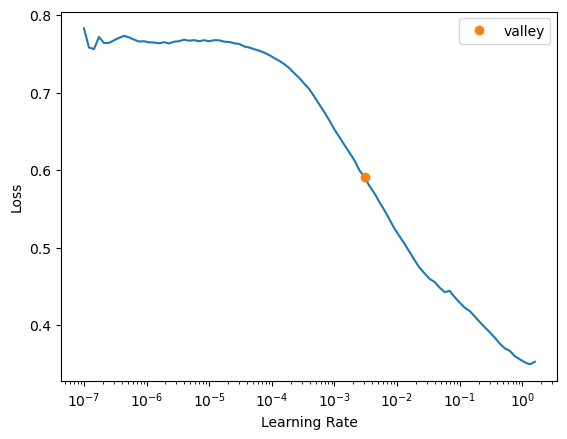

In [22]:
f1score = F1Score()

# learn = tabular_learner(dls, metrics=[accuracy, error_rate, f1score])
learn = tabular_learner(dls, metrics=[f1score, accuracy, error_rate])
lr_min, lr_steep = learn.lr_find()
print(lr_min)
print(lr_steep)

# Train the Model

In [23]:
learn.fit(n_epoch=100, lr=lr_min)

epoch,train_loss,valid_loss,f1_score,accuracy,error_rate,time
0,0.188430,0.153537,0.907268,0.964251,0.035749,00:00
1,0.128740,0.116445,0.915398,0.967794,0.032206,00:00
2,0.100172,0.108238,0.915457,0.968116,0.031884,00:00
3,0.080525,0.089318,0.913453,0.967472,0.032528,00:00
4,0.064856,0.086862,0.922166,0.970370,0.029630,00:00
5,0.054698,0.097103,0.916307,0.968760,0.031240,00:00
6,0.046494,0.091868,0.917727,0.968760,0.031240,00:00
7,0.041542,0.095978,0.907216,0.965217,0.034783,00:00
8,0.035572,0.080555,0.928391,0.972625,0.027375,00:00
9,0.031504,0.080753,0.926746,0.972303,0.027697,00:00


# Save the Model

In [24]:
name = "EEG_torch"
# save_format = int(input("Which format to save the model:\n\t1. .pt - PyTorch\n\t2. pkl - FastAi\n1 or 2:"))
save_format = 1
# Try both of them and let me know which one works
if save_format == 1:
    torch.save(learn, name + ".pt")
    print("Saved the model using torch")
elif save_format == 2:
    learn.export(name + ".pkl")
    print("Saved the model using FastAi")
else:
    print("Did not work")

Saved the model using torch


# Test the Model with Test Set

In [25]:
if save_format == 1:
    model = torch.load(name + ".pt")
    print("Loaded the .pt model using torch")
elif save_format == 2:
    model = torch.load(name + ".pkl")
    print("Loaded the .pkl model using torch")
else:
    print("Did not work")

Loaded the .pt model using torch


In [26]:
def get_row(row_number):
    # print(test_set.iloc[row_number].iloc[1:])
    row = test_set.iloc[row_number].iloc[1:-1]
    return row

In [27]:
row_num = 232
row, clas, probs = model.predict(get_row(row_num))

In [28]:
row.show()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,17.0,-2.0,-32.0,-41.000001,-31.999999,-3.0,54.0,112.999996,183.999995,246.000001,264.999993,231.999998,146.999996,62.000002,-12.0,-53.000001,-72.000002,-67.999999,-49.000002,-26.0,8.0,51.000002,101.0,138.0,168.999997,185.999993,182.000009,157.000004,133.0,112.999995,117.999995,133.000004,180.999992,224.000004,344.000005,262.000009,177.000005,29.999999,-172.000001,-341.999997,-725.999971,-1033.000015,-1296.000044,-1376.999946,-1306.999979,-1115.000019,-804.000014,-489.999999,-207.000007,-25.0,48.999998,50.999998,-11.0,-86.000002,-160.000002,-214.999994,-247.000005,-279.999993,-309.999992,-354.999988,-386.999984,-404.000003,-394.999982,-372.999987,-365.999989,-358.000003,-340.999997,-310.999993,-262.000009,-208.000001,-157.999999,-101.000003,-29.0,80.999998,183.999999,208.000005,146.999999,22.0,-58.000002,-43.000001,-3.0,41.000001,102.999997,138.999998,165.0,174.000009,59.999998,-83.0,-427.999995,-767.000014,-979.999971,-970.000025,-752.999998,-480.000015,-223.000005,65.0,364.000008,648.999984,854.000011,954.999971,904.999978,713.999979,438.999981,162.999994,-63.000002,-201.000002,-264.000001,-237.000004,-183.999992,-77.000002,-10.0,176.999995,385.000011,578.999993,690.000034,658.000002,585.999988,527.999981,452.000002,290.000004,71.000001,-92.0,-93.000003,73.999996,37.000001,-284.999996,-742.000035,-1114.000038,-1121.999963,-845.00002,-477.000012,-149.999997,56.0,134.999999,160.000005,100.999996,-79.000001,-306.999994,-456.99998,-441.00001,-309.999995,-162.000004,-61.000001,-1.0,52.0,110.999999,180.0,246.999993,338.999984,386.000006,431.000015,422.999996,401.999996,391.999985,464.999985,625.000019,771.000004,963.000001,1155.000008,1331.000012,1543.000002,1556.000008,1379.999999,813.000028,-223.999999,-1132.999979,-1786.000056,-1760.999987,-1421.000018,-1049.999996,-746.000038,-509.999983,-233.999995,34.000001,243.999998,366.999989,384.000012,336.999988,1


In [34]:
print(clas.int())

#result = torch.round(torch.abs(clas))

if clas.int() == 1:
    print("Seizure Detected")
else:
    print("No Seizure Detected")

tensor(0, dtype=torch.int32)
No Seizure Detected


In [29]:
test_set

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
10350,X22.V1.634,-99,-98,-62,-8,51,106,143,164,171,...,177,85,-70,-195,-209,-88,89,153,109,1
10351,X7.V1.413,18,-4,-10,4,14,15,0,-13,-33,...,-3,-8,-15,-15,0,16,31,30,21,3
10352,X16.V1.602,-57,-48,-44,-44,-37,-26,-23,-19,-13,...,-1,1,10,24,36,39,41,40,36,3
10353,X19.V1.4,-1,-16,-15,-13,-13,-17,-19,-18,-6,...,52,1,-23,-22,-5,-16,-27,-18,-1,5
10354,X14.V1.531,-50,-58,-57,-52,-41,-40,-35,-23,-20,...,-51,-44,-43,-38,-35,-13,19,52,97,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


In [30]:
test_set['y'].replace(1, 1, inplace=True)
test_set['y'].replace(2, 0, inplace=True)
test_set['y'].replace(3, 0, inplace=True)
test_set['y'].replace(4, 0, inplace=True)
test_set['y'].replace(5, 0, inplace=True)

In [31]:
test_set

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
10350,X22.V1.634,-99,-98,-62,-8,51,106,143,164,171,...,177,85,-70,-195,-209,-88,89,153,109,1
10351,X7.V1.413,18,-4,-10,4,14,15,0,-13,-33,...,-3,-8,-15,-15,0,16,31,30,21,0
10352,X16.V1.602,-57,-48,-44,-44,-37,-26,-23,-19,-13,...,-1,1,10,24,36,39,41,40,36,0
10353,X19.V1.4,-1,-16,-15,-13,-13,-17,-19,-18,-6,...,52,1,-23,-22,-5,-16,-27,-18,-1,0
10354,X14.V1.531,-50,-58,-57,-52,-41,-40,-35,-23,-20,...,-51,-44,-43,-38,-35,-13,19,52,97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,0
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,0
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,0


In [32]:
correct = 0
wrong = 0

for i in range(10350, 11500):
    row, clas, probs = model.predict(get_row(i-10350))
    if clas.int() == test_set['y'][i]:
        correct += 1
    else:
        print(i)
        print(str(clas.int()) + ", " + str(test_set['y'][i]))
        wrong += 1
print("Correct: ", correct)
print("Wrong: ", wrong)
print("Percent: " + str(correct / (correct + wrong)))

10350
tensor(0, dtype=torch.int32), 1


10399
tensor(0, dtype=torch.int32), 1


10428
tensor(1, dtype=torch.int32), 0


10547
tensor(0, dtype=torch.int32), 1


10568
tensor(0, dtype=torch.int32), 1


10639
tensor(0, dtype=torch.int32), 1


10702
tensor(1, dtype=torch.int32), 0


10736
tensor(0, dtype=torch.int32), 1


10738
tensor(0, dtype=torch.int32), 1


10816
tensor(0, dtype=torch.int32), 1


10830
tensor(0, dtype=torch.int32), 1


10918
tensor(0, dtype=torch.int32), 1


10943
tensor(0, dtype=torch.int32), 1


10961
tensor(0, dtype=torch.int32), 1


10984
tensor(0, dtype=torch.int32), 1


11006
tensor(1, dtype=torch.int32), 0


11072
tensor(0, dtype=torch.int32), 1


11083
tensor(0, dtype=torch.int32), 1


11105
tensor(0, dtype=torch.int32), 1


11153
tensor(0, dtype=torch.int32), 1


11204
tensor(0, dtype=torch.int32), 1


11270
tensor(0, dtype=torch.int32), 1


11271
tensor(0, dtype=torch.int32), 1


11274
tensor(0, dtype=torch.int32), 1


11298
tensor(1, dtype=torch.int32), 0


11299
tensor(0, dtype=torch.int32), 1


11351
tensor(0, dtype=torch.int32), 1


11446
tensor(1, dtype=torch.int32), 0


11481
tensor(0, dtype=torch.int32), 1


11483
tensor(1, dtype=torch.int32), 0


Correct:  1120
Wrong:  30
Percent: 0.9739130434782609
